Importeer de benodigde libraries

In [1]:
import os.path
import json
import math
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime


# Stap 1: Open en lezen van gemeente-veiligheidsregio's

In [2]:
with open('data/gemeente_veiligheidsregio.json', 'r') as f:
    regio_data = json.load(f)

# Stap 2: Voer een gemeente in en dan word de VR (veiligheidsregios) van die gemeente opgezocht

In [3]:
regios = ''
while not regios: # Nu kun je niet een niet bestaande stad invullen
    gemeente = input("Geef uw gemeente op: ")
    gemeente = gemeente.capitalize()  # Eerste letter = caps
    print('')  #Whitespace tussen de teksten door
    regios = [x for x in regio_data if x['name'] == gemeente]
regio = regios[0]['safetyRegion']
print("De veiligheidsregio nummer van " + gemeente + " is: " + regio)
print('')  # Whitespace tussen de teksten door
# VR van Groningen = VR01

Geef uw gemeente op: smallingerland

De veiligheidsregio nummer van Smallingerland is: VR02



# Stap 3: Welke steden zitten er allemaal in dezelfde VR?

In [4]:
gemeentes = [x for x in regio_data if x['safetyRegion'] == regio]
print("Gemeentes in deze regio: ")
for number, ss in enumerate(gemeentes):
    print(number+1, '\t' + ss['name'])  # Wil niet dat lijst bij '0' begint vandaar +1
print('')  # Whitespace tussen de teksten door

Gemeentes in deze regio: 
1 	Achtkarspelen
2 	Ameland
3 	Dantumadiel
4 	De Fryske Marren
5 	Harlingen
6 	Heerenveen
7 	Leeuwarden
8 	Noardeast-FryslÃ¢n
9 	Ooststellingwerf
10 	Opsterland
11 	Schiermonnikoog
12 	Smallingerland
13 	SÃºdwest-FryslÃ¢n
14 	Terschelling
15 	Tytsjerksteradiel
16 	Vlieland
17 	Waadhoeke
18 	Weststellingwerf



# Stap 4: Data ophalen

In [5]:
# Data ophalen en opslaan in arrays
file_name = 'data/{}.json'.format(regio)
with open(file_name, 'r') as f:
    data = json.load(f)

region_results = data['results_per_region']['values']

data_array = {
    'date_of_report_unix': [],
    'vrcode': [],
    'total_reported_increase_per_region': [],
    'infected_total_counts_per_region': [],
    'hospital_total_counts_per_region': [], # Data uit de source lijkt niet te kloppen
    'infected_increase_per_region': [],
    'hospital_increase_per_region': [],
    'infected_moving_avg_per_region': [],
    'hospital_moving_avg_per_region': [],
    'date_of_insertion_unix': []
}

# Dates array definiëren om datum input te verifiëren.
dates = []

for x in region_results:
    for key in x:
        if (key == 'date_of_report_unix'):
            data_array[key].append(x[key])

            unixDate = datetime.utcfromtimestamp(x[key]).strftime('%Y-%m-%d')
            dates.append(unixDate)
        else:
            data_array[key].append(x[key])

data_array_length = len(data_array['date_of_report_unix']) # is allemaal hetzelfde


# Stap 5: Voer een datum in de format van yyyy-mm-dd en tussen 2020-03-16 en 2020-10-06

In [6]:
datum = ''
while datum not in dates: # Je kunt alleen een bestaande datum vinden
    datum = input('Geef een geldige datum in het yyyy-mm-dd format op:') # we gebruiken deze format omdat dit ook zo in de data wordt gebruikt.


Geef een geldige datum in het yyyy-mm-dd format op:2020-08-10


# Stap 6: Grafieken

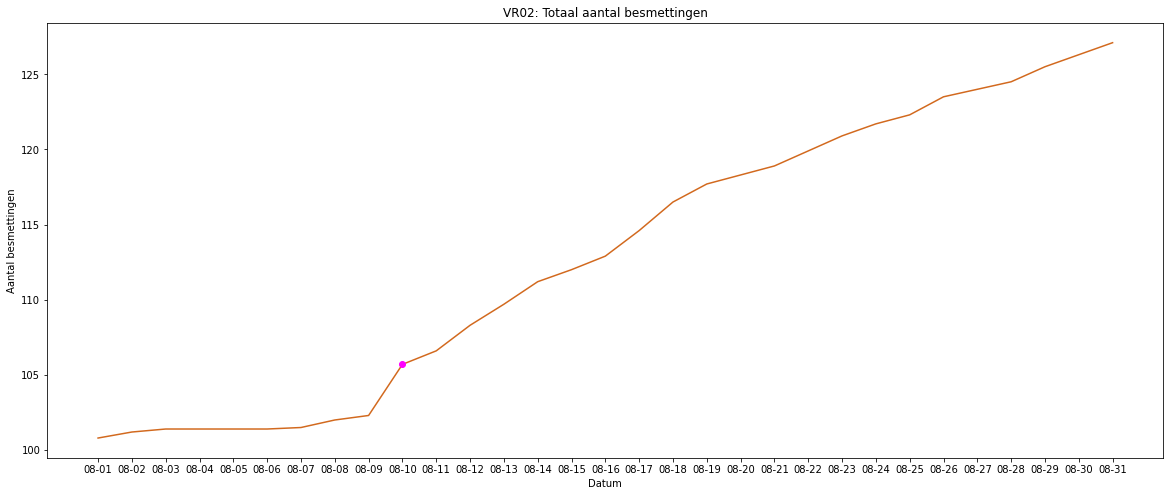

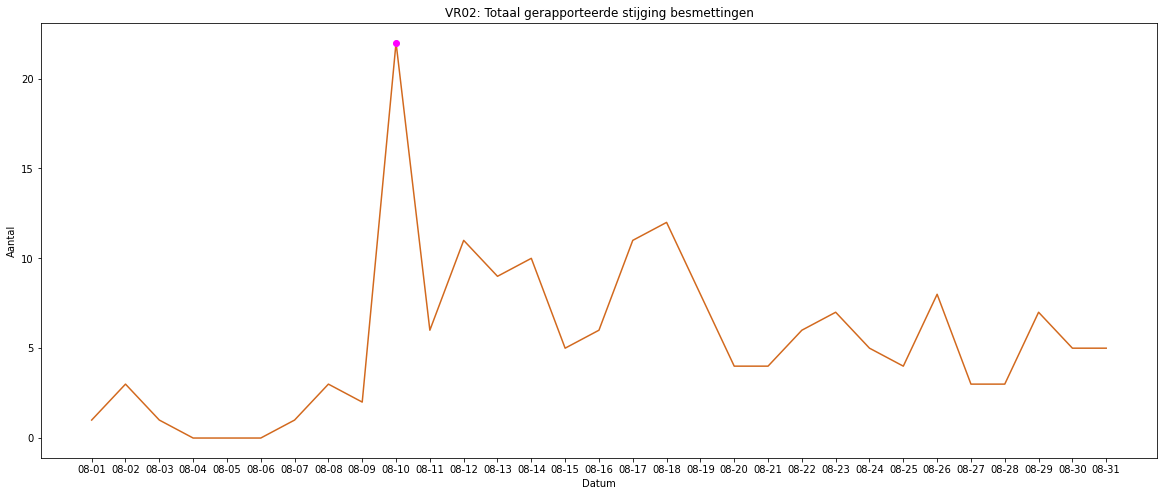

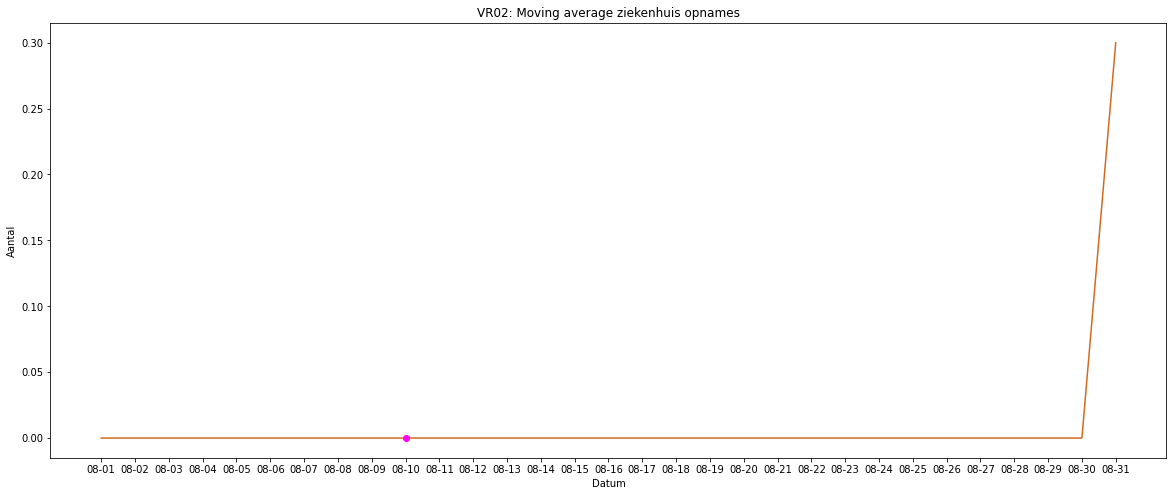

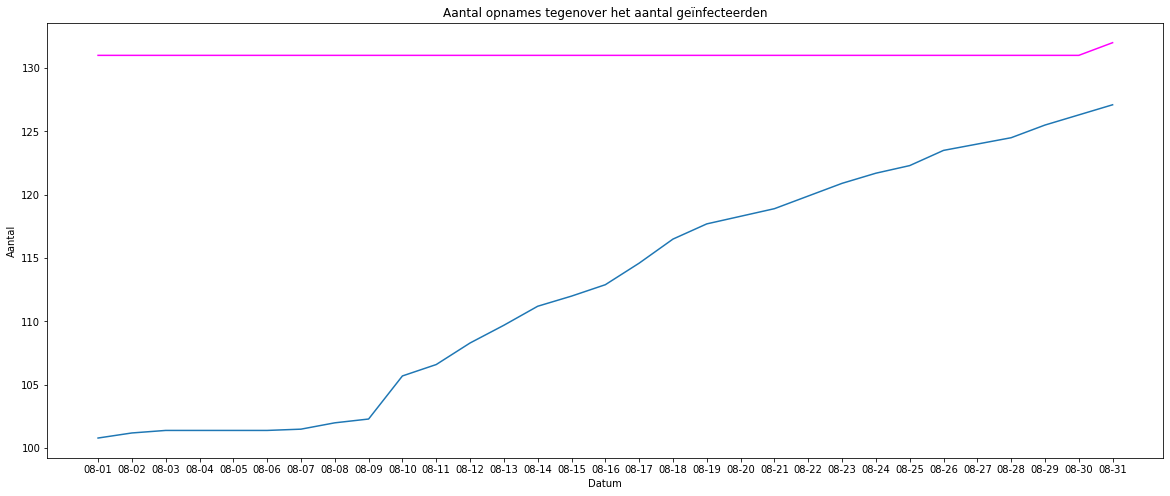

In [7]:
#region pak maand van datum
# we willen data laten zien van de maand waarin de datum is opgegeven
month_length = 0
dt = datetime.strptime(datum, "%Y-%m-%d")
month_with_31_days = [1, 3, 5, 7, 8, 10, 12]
month_with_30_days = [4, 6, 9, 11]
if dt.month in month_with_31_days:
    month_length = 31
elif dt.month in month_with_30_days:
    month_length = 30
else:
    month_length = 29 # 2020 was een schrikkeljaar we houden hier geen rekening mee voor nu, gelukkig is februari ook niet te vinden in de data
datum_middle_index = dates.index(datum)
datum_min_index = datum_middle_index - dt.day + 1 # index
datum_max_index = datum_middle_index + (month_length - dt.day)
#endregion

# Totaal aantal ziekenhuisopnames
x = dates[datum_min_index:datum_max_index + 1] 
xx = [a[5::] for a in x] # 5 omdat het dan '2020-' weghaald
y = data_array['infected_total_counts_per_region'][datum_min_index:datum_max_index + 1] 
plt.figure(figsize = (20, 8))
plt.title(regio + ": Totaal aantal besmettingen")
plt.xlabel("Datum")
plt.ylabel("Aantal besmettingen")
plt.plot(xx,y,color='chocolate')
plt.plot(xx[x.index(datum)],y[x.index(datum)], "ob", color='fuchsia')
plt.show()

#Totale hoeveelheid gerapporteerde besmettingen
x = dates[datum_min_index:datum_max_index + 1] 
xx = [a[5::] for a in x] # 5 omdat het dan '2020-' weghaald
y = data_array['total_reported_increase_per_region'][datum_min_index:datum_max_index + 1] 
plt.figure(figsize = (20, 8))
plt.title(regio + ": Totaal gerapporteerde stijging besmettingen") 
plt.xlabel("Datum")
plt.ylabel("Aantal")
plt.plot(xx,y,color='chocolate')
plt.plot(xx[x.index(datum)],y[x.index(datum)], "ob", color='fuchsia')
plt.show()

#Moving average van de ziekenhuisopnames
x = dates[datum_min_index:datum_max_index + 1] 
xx = [a[5::] for a in x] # 5 omdat het dan '2020-' weghaald
y = data_array['hospital_moving_avg_per_region'][datum_min_index:datum_max_index + 1] 
plt.figure(figsize = (20, 8))
plt.title(regio + ": Moving average ziekenhuis opnames")
plt.xlabel("Datum")
plt.ylabel("Aantal")
plt.plot(xx,y,color='chocolate')
plt.plot(xx[x.index(datum)],y[x.index(datum)], "ob", color='fuchsia')
plt.show()

#Ziekenhuis opnames vs. aantal besmettingen.
x = dates[datum_min_index:datum_max_index + 1] 
xx = [a[5::] for a in x] # 5 omdat het dan '2020-' weghaald
y = data_array['hospital_total_counts_per_region'][datum_min_index:datum_max_index + 1] # wil niet dat ie de laatste exclude
y1= data_array['infected_total_counts_per_region'][datum_min_index:datum_max_index + 1] # wil niet dat ie de laatste exclude

plt.figure(figsize = (20, 8))
plt.plot(xx,y, color='fuchsia')
plt.plot(xx,y1)
plt.title("Aantal opnames tegenover het aantal geïnfecteerden")
plt.xlabel("Datum")
plt.ylabel("Aantal")
plt.show()


#Fuchsia kleurige lijn is de ziekenhuisopnames, blauwe lijn is aantal besmettingen
